# ニューラルネットワークの訓練: 重みの更新回数と出力値

In [0]:
import numpy as np
import PIL.Image as  Image
import time

import matplotlib.pyplot as plt

import torch as t
import torch.optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv

各種関数を定義

In [18]:
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [0]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.l1 = nn.Linear(784, 1000) 
        self.l2 = nn.Linear(1000, 1000)
        self.l3 = nn.Linear(1000, 10)

    def forward(self, x):
        h = x.view(-1, 28*28) # (N, 1, 28, 28) -> (N, 784)
        # １層目
        h = F.relu(self.l1(h))
        # ２層目
        h = F.relu(self.l2(h))
        # 出力層
        return self.l3(h)

In [0]:
def dev_env(tensor):
      return "cuda" if tensor.is_cuda else "cpu"

In [0]:
def learn(model, batchsize, epochs, iterations):
    """
    指定されたモデルを指定回数分だけ訓練させる関数。
    """
    train_loader = t.utils.data.DataLoader(trainset, batch_size=batchsize)
    optimizer = t.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    criterion = criterion.to(device)
    model.train()
    model = model.to(device)
    if iterations is None:
        iterations = len(train_loader.dataset.data)
    for epoch in range(epochs):
        running_loss = 0.0
        start = time.time()
        for i, (inputs, labels) in enumerate(train_loader):
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()
            if iterations < (i +1):
                break
            # print statistics
            running_loss += loss.item()
            if False and i % 100 == 99:
                end = time.time()
                print('[{:d}, {:5d}] loss: {:.3f} (elapsed: {:.3f} [s] by {})'
                         .format(epoch + 1, i + 1, running_loss / 100, end-start, dev_env(outputs)))
                running_loss = 0.0
                start = time.time()
    return model

In [0]:
def predict(model, test_data):
      model.eval()
      input_tensor = test_data[0]
      input_tensor.unsqueeze_(0)
      prediction = model(Variable(input_tensor).to(device))
      #prediction.data[0] = F.softmax(prediction.data[0], dim=0) # Disable Softmax
      return prediction

In [0]:
def print_prediction(prediction, test_data):
      prediction = prediction.cpu()
      data_volume = len(prediction.data[0])
      fig, ax = plt.subplots(1,2, figsize=(10, 5))
      # 確率グラフを表示
      ax[0].set_title("Prediction")
      ax[0].set_xticks(np.arange(0, data_volume, 1))
      ax[0].bar(x=range(data_volume), height=prediction.data[0])
      # 画像データを表示
      ax[1].set_title("Image")
      ax[1].imshow(test_data[0].reshape(28,28))

In [0]:
def train_and_eval(model, test_index, batchsize=100, epochs=1, iterations=None):
    # Training process
    learned_model = learn(model, batchsize, epochs, iterations)
    # Evaluation process
    test_data = testset[test_index]
    prediction = predict(learned_model, test_data)
    print_prediction(prediction, test_data)

データをロードして準備しましょう。

In [0]:
 preprocess = tv.transforms.Compose([
                                  tv.transforms.ToTensor()
                                  ])

In [0]:
trainset = tv.datasets.MNIST('~/tmp/mnist', 
                                           train=True,
                                           download=True,
                                           transform=preprocess)

In [0]:
testset = tv.datasets.MNIST('~/tmp/mnist',
                                          train=False,
                                          download=True,
                                          transform=preprocess)

## トレーニングを繰り返す

In [0]:
batchsize=10

モデルは内部に学習データを持つので、毎回新しいインスタンスを作ること。

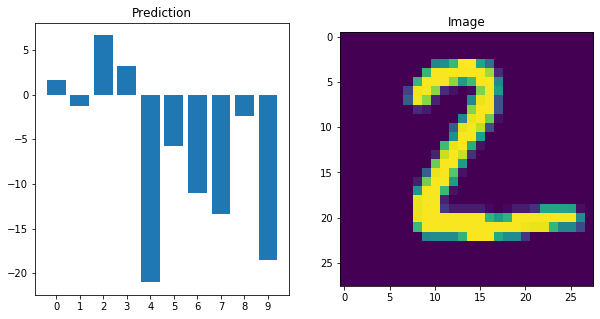

In [30]:
train_and_eval(model=MLP(), test_index=1, batchsize=batchsize, epochs=1)

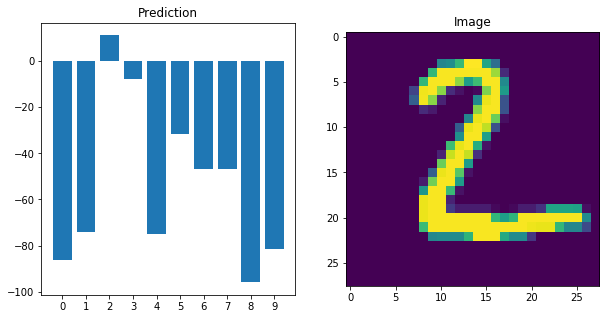

In [31]:
train_and_eval(model=MLP(), test_index=1, batchsize=batchsize, epochs=5)

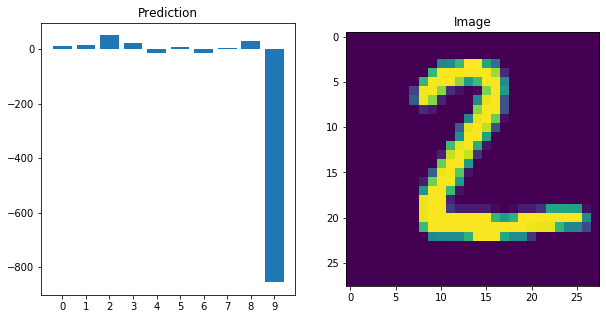

In [32]:
train_and_eval(model=MLP(), test_index=1, batchsize=batchsize, epochs=10)

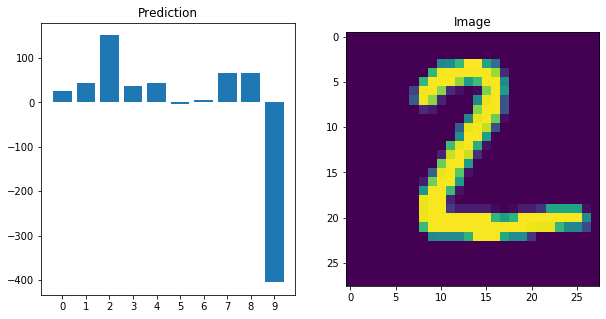

In [33]:
train_and_eval(model=MLP(), test_index=1, batchsize=batchsize, epochs=15)

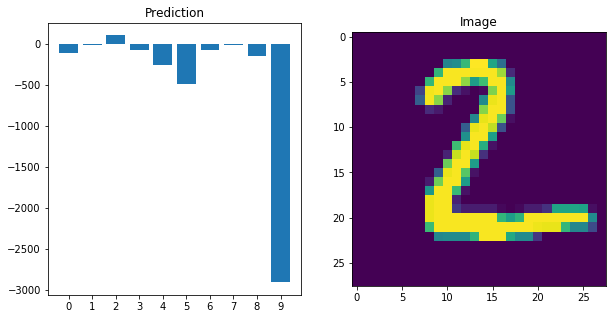

In [34]:
train_and_eval(model=MLP(), test_index=1, batchsize=batchsize, epochs=20)

# sample_id=2

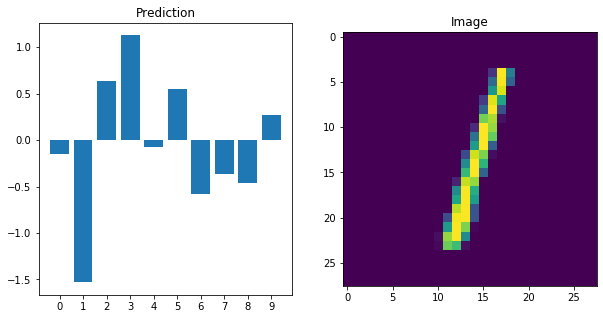

In [35]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=1)

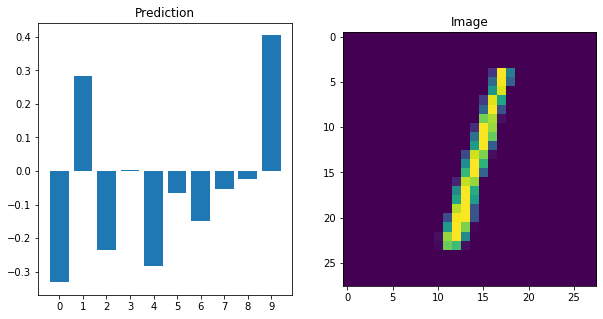

In [36]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=5)

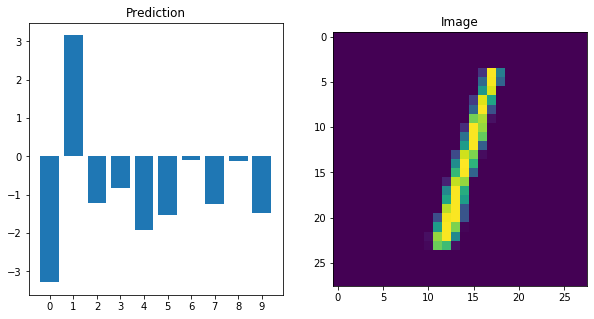

In [37]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=10)

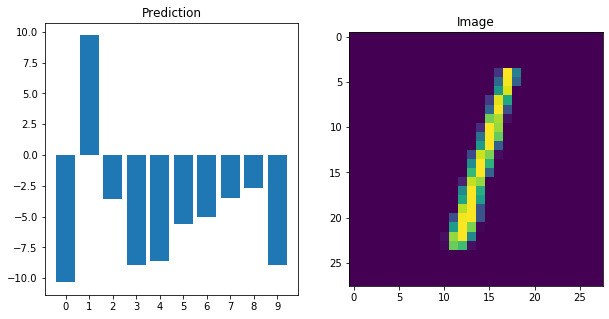

In [38]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=50)

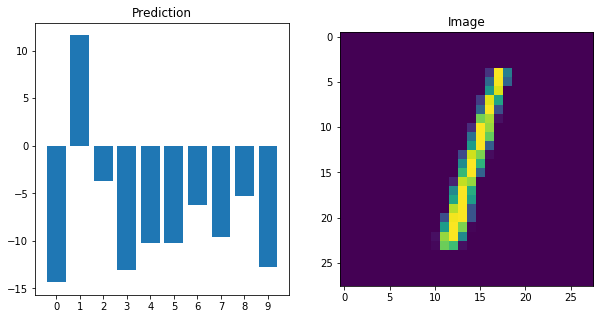

In [39]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=100)

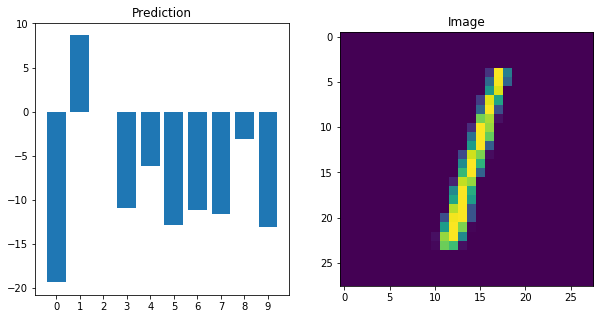

In [40]:
train_and_eval(model=MLP(), test_index=2, batchsize=batchsize, iterations=200)

## ここで確認できること

ニューラルネットワークの訓練が進むにつれて、手書き文字列画像を入力すると、その手書き文字列が所属するクラス
の値が最大値を示すようになります。